<a href="https://colab.research.google.com/github/brian6870/machine-learning-tools/blob/main/task1_iris_classification_py.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

=== Iris Dataset Exploration ===
Dataset shape: (150, 4)
Feature names: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
Target names: ['setosa' 'versicolor' 'virginica']
Target distribution: [50 50 50]

First 5 rows:
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   species species_name  
0        0       setosa  
1        0       setosa  
2        0       setosa  
3        0       setosa  
4        0       setosa  


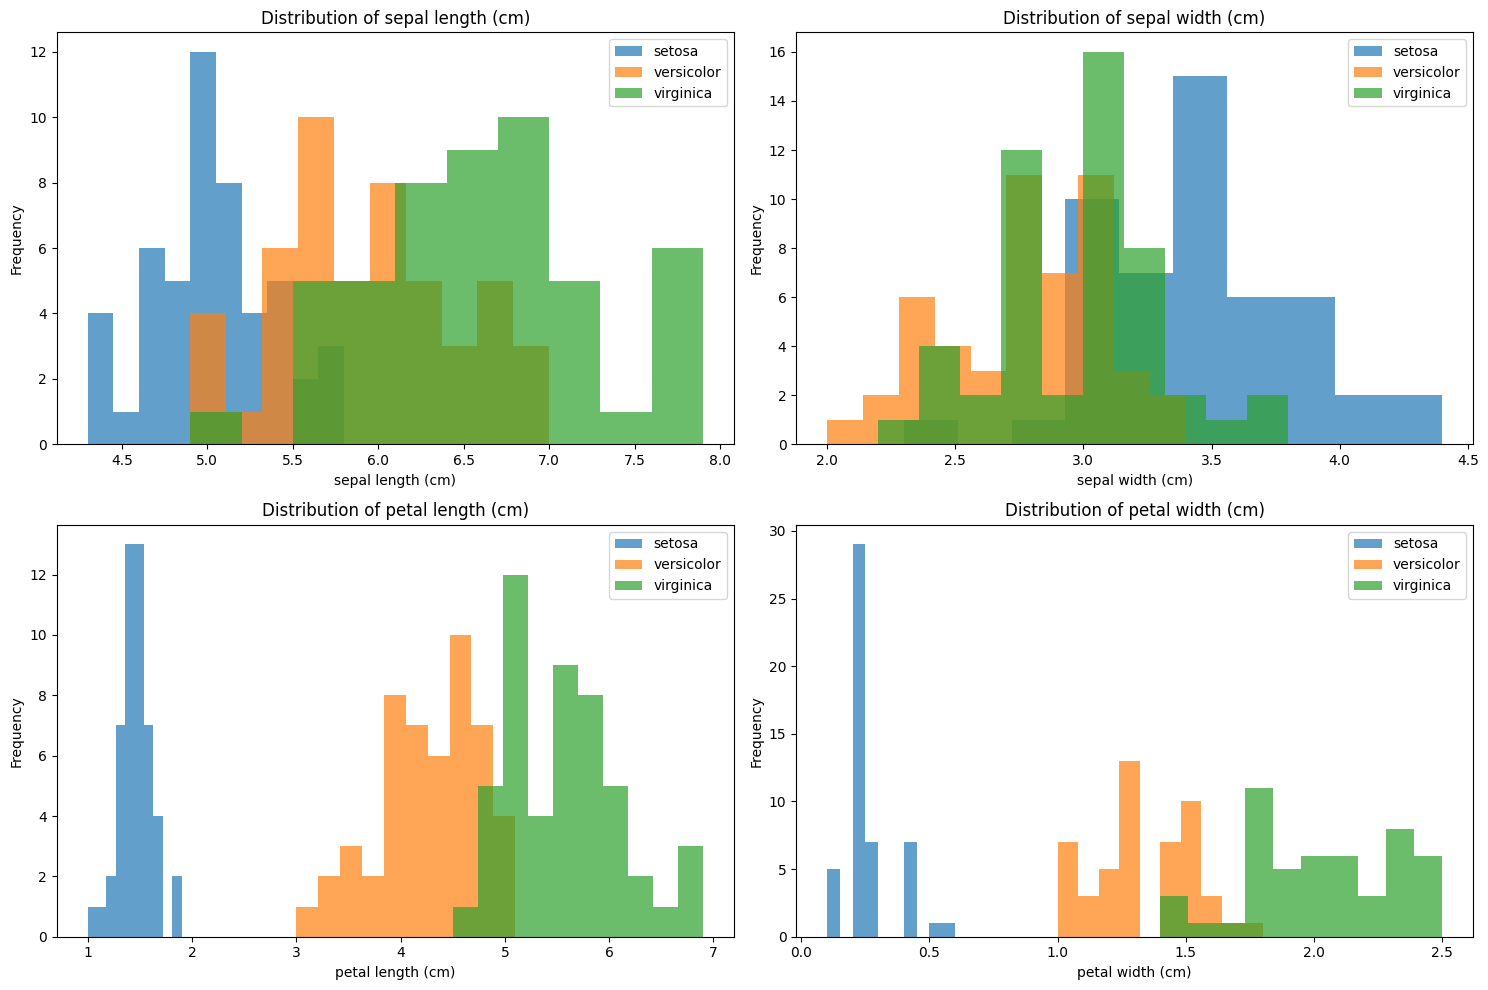

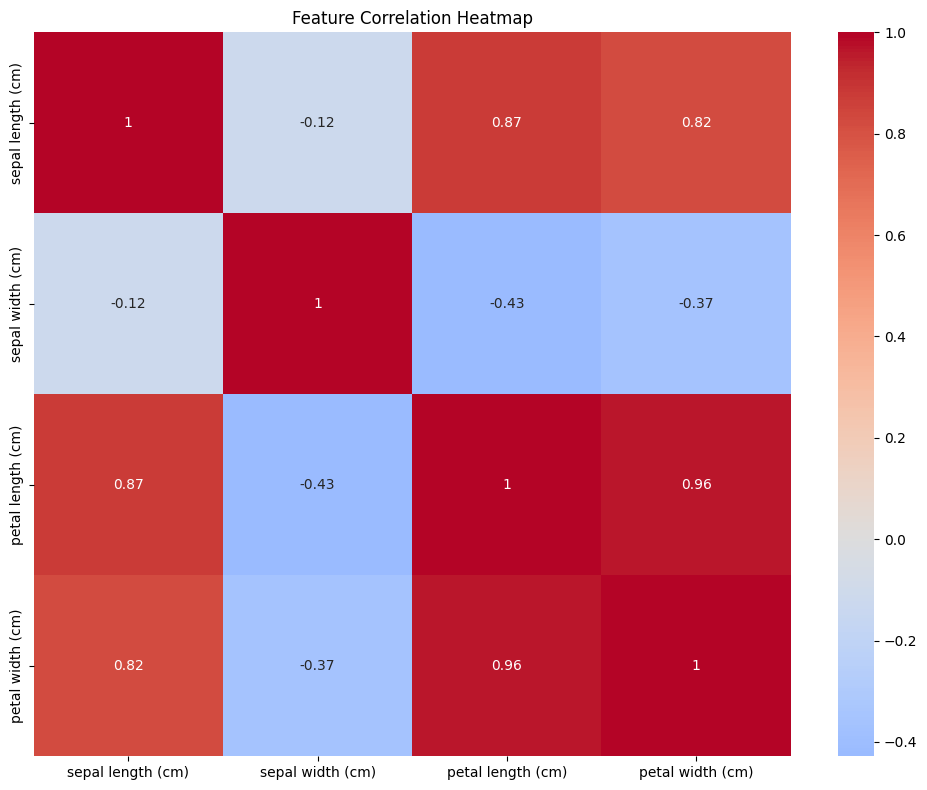


Training set size: 120
Test set size: 30

Cross-validation scores: [0.91666667 0.95833333 0.95833333 0.91666667 0.91666667]
Mean CV accuracy: 0.9333 (+/- 0.0408)

=== Model Evaluation ===
Accuracy: 0.9667
Precision: 0.9697
Recall: 0.9667

Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      0.90      0.95        10
   virginica       0.91      1.00      0.95        10

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30



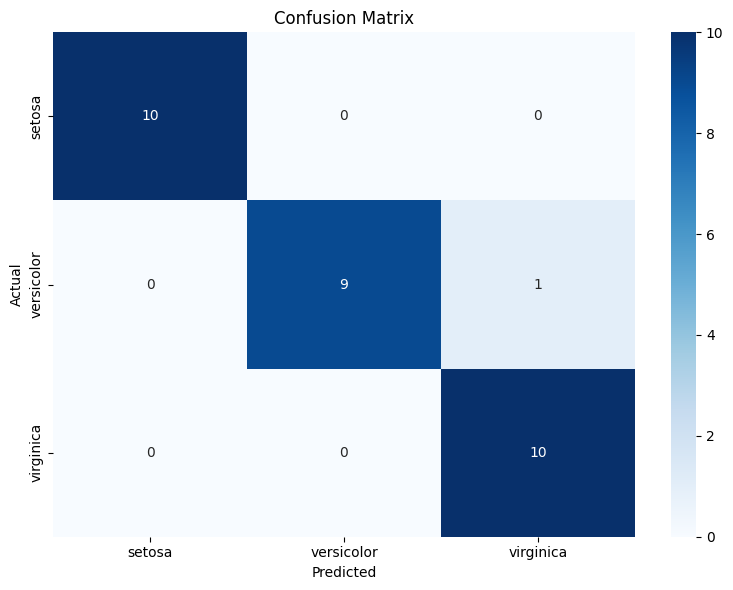


=== Decision Tree Rules ===
|--- petal length (cm) <= -0.74
|   |--- class: 0
|--- petal length (cm) >  -0.74
|   |--- petal width (cm) <= 0.59
|   |   |--- petal length (cm) <= 0.68
|   |   |   |--- class: 1
|   |   |--- petal length (cm) >  0.68
|   |   |   |--- class: 2
|   |--- petal width (cm) >  0.59
|   |   |--- petal length (cm) <= 0.62
|   |   |   |--- class: 2
|   |   |--- petal length (cm) >  0.62
|   |   |   |--- class: 2



In [ ]:
# task1_iris_classification.py
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.tree import export_text
import matplotlib.pyplot as plt
import seaborn as sns

class IrisClassifier:
    def __init__(self):
        self.model = None
        self.scaler = StandardScaler()
        self.iris = load_iris()

    def load_and_explore_data(self):
        """Load and explore the Iris dataset"""
        print("=== Iris Dataset Exploration ===")
        print(f"Dataset shape: {self.iris.data.shape}")
        print(f"Feature names: {self.iris.feature_names}")
        print(f"Target names: {self.iris.target_names}")
        print(f"Target distribution: {np.bincount(self.iris.target)}")

        # Create DataFrame for better visualization
        df = pd.DataFrame(self.iris.data, columns=self.iris.feature_names)
        df['species'] = self.iris.target
        df['species_name'] = df['species'].map({0: 'setosa', 1: 'versicolor', 2: 'virginica'})

        print("\nFirst 5 rows:")
        print(df.head())

        return df

    def visualize_data(self, df):
        """Create visualizations for the Iris dataset"""
        fig, axes = plt.subplots(2, 2, figsize=(15, 10))

        # Feature distributions by species
        features = self.iris.feature_names
        for i, feature in enumerate(features):
            row, col = i // 2, i % 2
            for species in df['species_name'].unique():
                species_data = df[df['species_name'] == species][feature]
                axes[row, col].hist(species_data, alpha=0.7, label=species)
            axes[row, col].set_title(f'Distribution of {feature}')
            axes[row, col].legend()
            axes[row, col].set_xlabel(feature)
            axes[row, col].set_ylabel('Frequency')

        plt.tight_layout()
        plt.savefig('iris_distributions.png', dpi=300, bbox_inches='tight')
        plt.show()

        # Correlation heatmap
        plt.figure(figsize=(10, 8))
        numeric_df = df.drop(['species', 'species_name'], axis=1)
        correlation_matrix = numeric_df.corr()
        sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
        plt.title('Feature Correlation Heatmap')
        plt.tight_layout()
        plt.savefig('iris_correlation.png', dpi=300, bbox_inches='tight')
        plt.show()

    def preprocess_data(self):
        """Preprocess the data"""
        X = self.iris.data
        y = self.iris.target

        # Scale features
        X_scaled = self.scaler.fit_transform(X)

        # Split data
        X_train, X_test, y_train, y_test = train_test_split(
            X_scaled, y, test_size=0.2, random_state=42, stratify=y
        )

        print(f"\nTraining set size: {X_train.shape[0]}")
        print(f"Test set size: {X_test.shape[0]}")

        return X_train, X_test, y_train, y_test

    def train_model(self, X_train, y_train):
        """Train the decision tree classifier"""
        self.model = DecisionTreeClassifier(
            random_state=42,
            max_depth=3,  # Limit depth for interpretability
            min_samples_split=5
        )

        self.model.fit(X_train, y_train)

        # Cross-validation
        cv_scores = cross_val_score(self.model, X_train, y_train, cv=5)
        print(f"\nCross-validation scores: {cv_scores}")
        print(f"Mean CV accuracy: {cv_scores.mean():.4f} (+/- {cv_scores.std() * 2:.4f})")

        return cv_scores

    def evaluate_model(self, X_test, y_test):
        """Evaluate the model performance"""
        y_pred = self.model.predict(X_test)

        accuracy = accuracy_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred, average='weighted')
        recall = recall_score(y_test, y_pred, average='weighted')

        print("\n=== Model Evaluation ===")
        print(f"Accuracy: {accuracy:.4f}")
        print(f"Precision: {precision:.4f}")
        print(f"Recall: {recall:.4f}")

        print("\nClassification Report:")
        print(classification_report(y_test, y_pred, target_names=self.iris.target_names))

        # Confusion matrix
        cm = confusion_matrix(y_test, y_pred)
        plt.figure(figsize=(8, 6))
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                   xticklabels=self.iris.target_names,
                   yticklabels=self.iris.target_names)
        plt.title('Confusion Matrix')
        plt.xlabel('Predicted')
        plt.ylabel('Actual')
        plt.tight_layout()
        plt.savefig('iris_confusion_matrix.png', dpi=300, bbox_inches='tight')
        plt.show()

        return accuracy, precision, recall

    def display_tree_rules(self):
        """Display the decision tree rules"""
        print("\n=== Decision Tree Rules ===")
        tree_rules = export_text(self.model, feature_names=self.iris.feature_names)
        print(tree_rules)

    def run_complete_analysis(self):
        """Run complete analysis pipeline"""
        # Load and explore data
        df = self.load_and_explore_data()

        # Visualize data
        self.visualize_data(df)

        # Preprocess data
        X_train, X_test, y_train, y_test = self.preprocess_data()

        # Train model
        cv_scores = self.train_model(X_train, y_train)

        # Evaluate model
        accuracy, precision, recall = self.evaluate_model(X_test, y_test)

        # Display rules
        self.display_tree_rules()

        return {
            'cv_scores': cv_scores,
            'accuracy': accuracy,
            'precision': precision,
            'recall': recall
        }

if __name__ == "__main__":
    # Run the complete iris classification pipeline
    iris_classifier = IrisClassifier()
    results = iris_classifier.run_complete_analysis()